- FiFa Data Analysis
- By: Jose Heras

In [205]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [206]:
FILE_PATH = "data/players_20.csv"
EUR_TO_DOLLAR_CONVERSION = 1.09

1. Load CSV file:
    - Show top 5 records 

In [207]:
fifa_df = pd.read_csv(FILE_PATH)

Data Cleaning

In [208]:
columns_to_be_removed = ['ls',
           'st',
           'rs',
           'lw',
           'lf',
           'cf',
           'rf',
           'rw',
           'lam',
           'cam',
           'ram',
           'lm',
           'lcm',
           'cm',
           'rcm',
           'rm',
           'lwb',
           'ldm',
           'cdm',
           'rdm',
           'rwb',
           'lb',
           'lcb',
           'cb',
           'rcb',
           'rb']
fifa_df.drop(columns=columns_to_be_removed, inplace=True)

In [209]:
fifa_df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,75,96,33,37,26,6,11,15,14,8
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,85,95,28,32,24,7,11,15,14,11
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,90,94,27,26,29,9,9,15,15,11
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,11,68,27,12,18,87,92,78,90,89
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,88,91,34,27,22,11,12,6,8,8


2. Monetary conversion:
    - Eur to Doll

In [210]:
monetary_columns = {'wage_eur' : 'wage', 'value_eur':'value'}
fifa_df[ 'wage_eur'] = fifa_df['wage_eur'] * EUR_TO_DOLLAR_CONVERSION
fifa_df['value_eur'] = fifa_df['value_eur'] * EUR_TO_DOLLAR_CONVERSION

# Update column names
fifa_df = fifa_df.rename(columns=monetary_columns)

How would you be able to see each column in the dataset?

In [211]:
fifa_df.columns.to_list()

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value',
 'wage',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions'

3. Show the number of rows and columns in the dataset:

In [212]:
print(f"There are {fifa_df.shape[0]} rows and {fifa_df.shape[1]} columns in this dataset.")

There are 18278 rows and 78 columns in this dataset.


4. Show the number of players in each country:

In [213]:
player_count_by_country = fifa_df['nationality'].value_counts().reset_index()
player_count_by_country

,nationality,count
0,England,1667
1,Germany,1216
2,Spain,1035
3,France,984
4,Argentina,886
...,...,...
157,Liberia,1
158,São Tomé & Príncipe,1
159,Puerto Rico,1
160,Bahrain,1


5. Show the top 10 countries with the highest amount of players:

[Text(0.5, 0, 'Player Count'),
 Text(0, 0.5, 'Country of Origin'),
 Text(0.5, 1.0, 'Player Count by Country of Origin')]

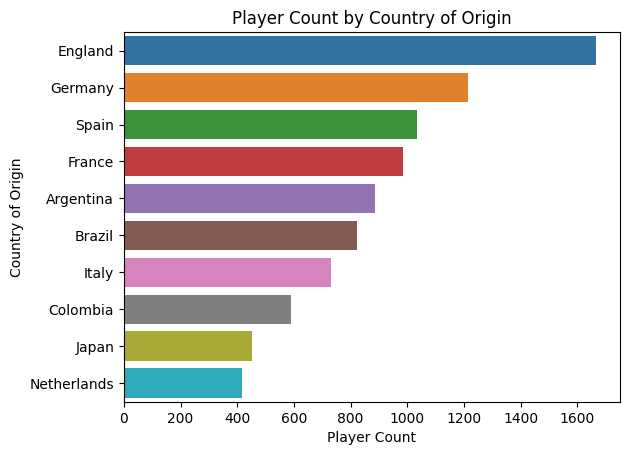

In [214]:
data = player_count_by_country.head(10)
sns_graph = sns.barplot(data=data, y='nationality', x='count')
sns_graph.set(xlabel='Player Count', ylabel="Country of Origin", title="Player Count by Country of Origin")

6. Create a bar plot of the top 5 countries with the highest number of players:
    - Fill Bars using green

[Text(0.5, 0, 'Player Count'),
 Text(0, 0.5, 'Country of Origin'),
 Text(0.5, 1.0, 'Player Count by Country of Origin')]

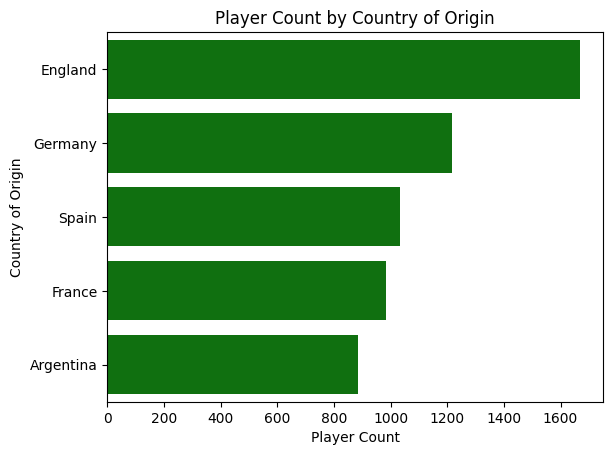

In [215]:
data = player_count_by_country.head()
sns_graph = sns.barplot(data=data, y='nationality', x='count', color='Green')
sns_graph.set(xlabel='Player Count', ylabel="Country of Origin", title="Player Count by Country of Origin")

Display the short name and wages for the top 5 players:

In [216]:
fifa_df[['short_name', 'wage']].head()

,short_name,wage
0,L. Messi,615850.0
1,Cristiano Ronaldo,441450.0
2,Neymar Jr,316100.0
3,J. Oblak,136250.0
4,E. Hazard,512300.0


Display the short name and wages for the top 5 players with highest salaries

In [217]:
data = fifa_df[['short_name', 'wage']].assign(
    salary=lambda x: x['wage'] * 52).sort_values(by='salary', ascending=False).head()
data

,short_name,wage,salary
0,L. Messi,615850.0,32024200.0
4,E. Hazard,512300.0,26639600.0
1,Cristiano Ronaldo,441450.0,22955400.0
5,K. De Bruyne,403300.0,20971600.0
22,A. Griezmann,403300.0,20971600.0


Create a barplot of the previous data

<Axes: xlabel='salary', ylabel='short_name'>

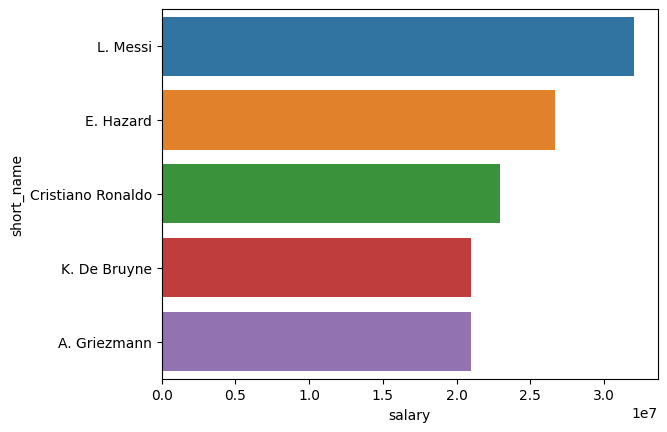

In [218]:
sns.barplot(data=data, x='salary', y='short_name')

Show the 10 records of Germany:

In [219]:
# Filtering out all non german players
german_players_df = fifa_df[fifa_df['nationality'].str.match(pat="Germany", case=False)]

In [220]:
german_players_df.head(10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,25,70,25,13,10,88,85,88,88,90
31,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,33,1986-03-27,193,92,Germany,FC Bayern München,...,47,70,17,10,11,87,87,91,85,87
36,182521,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,...,73,88,72,70,62,10,11,13,7,10
37,188350,https://sofifa.com/player/188350/marco-reus/20...,M. Reus,Marco Reus,30,1989-05-31,180,71,Germany,Borussia Dortmund,...,90,85,49,37,45,12,12,13,13,11
49,178603,https://sofifa.com/player/178603/mats-hummels/...,M. Hummels,Mats Hummels,30,1988-12-16,191,94,Germany,Borussia Dortmund,...,68,89,90,89,86,15,6,10,5,6
55,222492,https://sofifa.com/player/222492/leroy-sane/20...,L. Sané,Leroy Sané,23,1996-01-11,183,75,Germany,Manchester City,...,71,80,36,32,35,8,12,9,9,14
61,212622,https://sofifa.com/player/212622/joshua-kimmic...,J. Kimmich,Joshua Kimmich,24,1995-02-08,176,73,Germany,FC Bayern München,...,44,85,78,80,79,8,15,7,15,15
70,189596,https://sofifa.com/player/189596/thomas-muller...,T. Müller,Thomas Müller,29,1989-09-13,186,75,Germany,FC Bayern München,...,60,84,44,57,46,6,7,11,14,14
77,212190,https://sofifa.com/player/212190/niklas-sule/2...,N. Süle,Niklas Süle,23,1995-09-03,195,97,Germany,FC Bayern München,...,32,75,85,89,87,15,7,14,7,15
109,235790,https://sofifa.com/player/235790/kai-havertz/2...,K. Havertz,Kai Havertz,20,1999-06-11,188,83,Germany,Bayer 04 Leverkusen,...,69,84,39,46,38,6,8,11,10,12


Show top 5 records of German players in terms of:
- Max Height
- Max weight
- Highest Wage

In [221]:
def filter_players_in_terms_of(*args, sorting_column=None, dataframe=None) -> pd.DataFrame:
    if not sorting_column:
        sorting_column = args[0]
    
    if dataframe is None:
        dataframe = fifa_df

    return dataframe[['short_name', *args]].sort_values(by=sorting_column, ascending=False).head(5)

- Max Height

In [222]:
filter_players_in_terms_of('height_cm', dataframe=german_players_df)

,short_name,height_cm
8016,A. Seydel,199
1217,M. Esser,198
1389,L. Unnerstall,198
11859,D. Stroh-Engel,197
13576,L. Watkowiak,197


- Max Weight

In [223]:
filter_players_in_terms_of('weight_kg', dataframe=german_players_df)

,short_name,weight_kg
13576,L. Watkowiak,103
1389,L. Unnerstall,103
518,R. Fährmann,98
1217,M. Esser,97
77,N. Süle,97


- Highest Wage

In [224]:
filter_players_in_terms_of('wage', dataframe=german_players_df)

,short_name,wage
36,T. Kroos,359700.0
6,M. ter Stegen,272500.0
55,L. Sané,212550.0
146,I. Gündoğan,196200.0
70,T. Müller,185300.0


Display the short name and wages of the top 5 German Players

In [225]:
filter_players_in_terms_of('weight_kg', dataframe=german_players_df)

,short_name,weight_kg
13576,L. Watkowiak,103
1389,L. Unnerstall,103
518,R. Fährmann,98
1217,M. Esser,97
77,N. Süle,97


Top 5 players with top shooting skills

In [226]:
filter_players_in_terms_of('shooting')

,short_name,shooting
1,Cristiano Ronaldo,93.0
0,L. Messi,92.0
12,H. Kane,91.0
17,S. Agüero,90.0
205,F. Quagliarella,89.0


Top 5 players records: Short Name | Defending | Nationality | Club

In [227]:
# Best of the best in terms of defending.
filter_players_in_terms_of('defending', 'nationality', 'club')

,short_name,defending,nationality,club
16,G. Chiellini,90.0,Italy,Juventus
7,V. van Dijk,90.0,Netherlands,Liverpool
11,K. Koulibaly,89.0,Senegal,Napoli
35,D. Godín,89.0,Uruguay,Inter
49,M. Hummels,89.0,Germany,Borussia Dortmund


Real Madrid Club Analysis

In [228]:
real_madrid_df = fifa_df[fifa_df['club'] == 'Real Madrid']

Wage Records of the top 5 player of Real Madrid

In [229]:

filter_players_in_terms_of('wage', dataframe=real_madrid_df)

,short_name,wage
4,E. Hazard,512300.0
8,L. Modrić,370600.0
36,T. Kroos,359700.0
18,Sergio Ramos,327000.0
46,K. Benzema,310650.0


Top 5 in terms of shooting:

In [230]:
filter_players_in_terms_of('shooting', dataframe=real_madrid_df)

,short_name,shooting
100,G. Bale,87.0
106,J. Rodríguez,86.0
4,E. Hazard,83.0
46,K. Benzema,82.0
161,L. Jović,82.0


Top 5 in terms of defending:

In [231]:
filter_players_in_terms_of('defending', dataframe=real_madrid_df)

,short_name,defending
18,Sergio Ramos,87.0
42,Casemiro,85.0
76,R. Varane,85.0
94,Carvajal,82.0
332,Éder Militão,81.0


Nationality from top 5 players in Real Madrid

In [232]:
""" 
    Going to use 'Overall' as metric for top players
"""

filter_players_in_terms_of('overall', 'nationality', dataframe=real_madrid_df)

,short_name,overall,nationality
4,E. Hazard,91,Belgium
8,L. Modrić,90,Croatia
18,Sergio Ramos,89,Spain
28,T. Courtois,88,Belgium
36,T. Kroos,88,Germany


Insights 

Scatter plot overall rating vs potential rating

<Axes: xlabel='overall', ylabel='potential'>

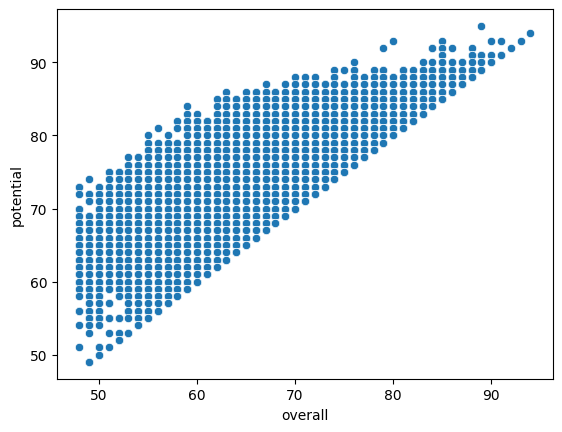

In [233]:
data = fifa_df[['overall', 'potential']]
sns.scatterplot(data=data, y='potential', x='overall')


Statistics in terms of preferred foot:

In [234]:
# Assigning the columns for graph
columns_for_comparison = ['preferred_foot', 'overall', 'potential', 'skill_moves', 'shooting']

# Separating groups between left and right foot players
left_foot_players = fifa_df[fifa_df['preferred_foot'] == 'Left']
# Using a randomly selected sample from right foot players
right_foot_players = fifa_df[fifa_df['preferred_foot'] == 'Right'].sample(n=left_foot_players.shape[0])


preferred_foot_df =  pd.concat([left_foot_players, right_foot_players])
preferred_foot_df= preferred_foot_df[columns_for_comparison].groupby('preferred_foot').mean().round(decimals=2).reset_index()

# Melting dataframe so it could be used in the barplot
preferred_foot_df = preferred_foot_df.melt(id_vars=['preferred_foot'], var_name='stat', value_name='value')

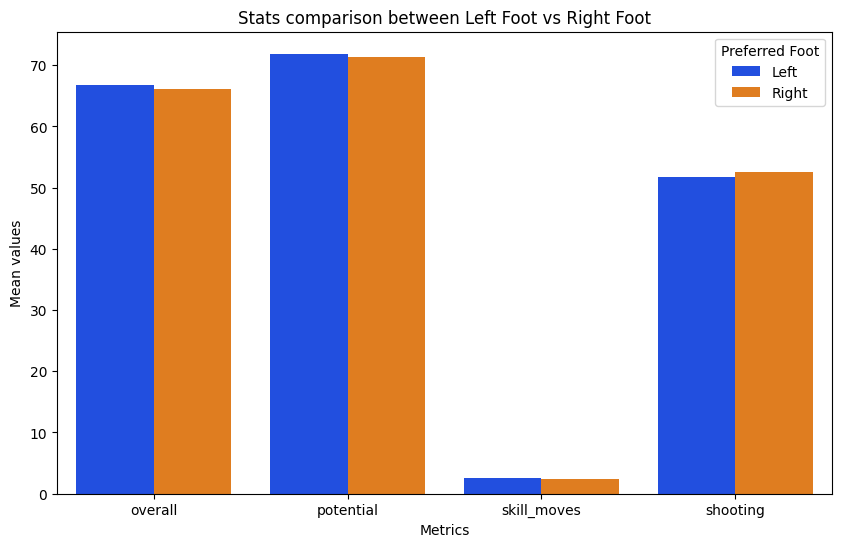

In [235]:
plt.figure(figsize=(10,6))
sns_graph = sns.barplot(data=preferred_foot_df, x='stat', y='value', hue='preferred_foot', palette='bright')
sns_graph.set(xlabel='Metrics', ylabel='Mean values', title='Stats comparison between Left Foot vs Right Foot')
plt.legend(title='Preferred Foot')

Comparison of Stats on different metrics using the Top 5 Nations with most players

In [236]:
columns_for_graph = ['nationality', 'overall', 'potential', 'shooting', 'defending', 'power_shot_power']

data = fifa_df[fifa_df['nationality'].isin(player_count_by_country.head()['nationality'].to_list())]
data = data[columns_for_graph].groupby(columns_for_graph[0]).mean().dropna().reset_index()
data = data.melt(id_vars=['nationality'], var_name='Stats', value_name="Values")

[Text(0.5, 1.0, 'Stats comparison in terms of Top 5 Nations with most players')]

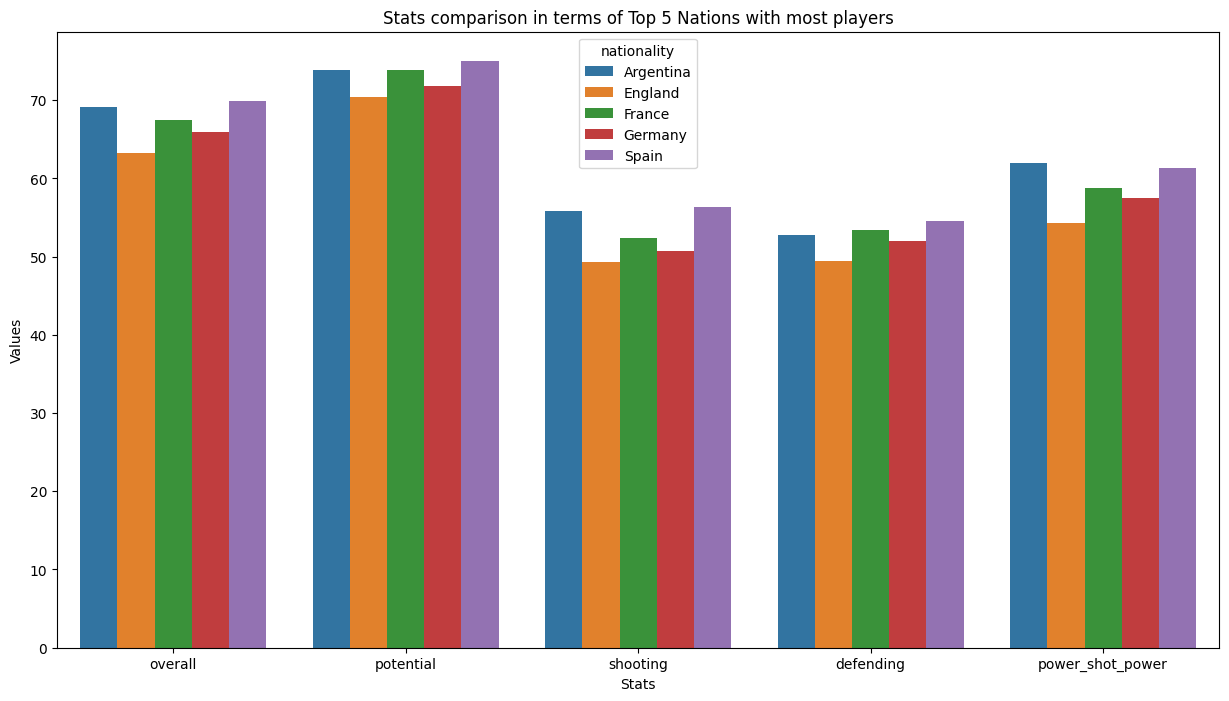

In [237]:
plt.figure(figsize=(15, 8))
sns_graph = sns.barplot(data=data, y='Values', x='Stats', hue='nationality')
sns_graph.set(title='Stats comparison in terms of Top 5 Nations with most players')

Distribution of players by nationality between clubs

In [238]:
nationality = 'England'

players_by_club_df = fifa_df[fifa_df['nationality'] == nationality][['club', 'sofifa_id']].groupby('club').count().sort_values(
    by='sofifa_id', ascending=False).reset_index().rename(columns={'sofifa_id': 'player_count'})
players_by_club_df.head(30)


,club,player_count
0,Exeter City,24
1,Colchester United,24
2,Tranmere Rovers,24
3,Blackburn Rovers,24
4,Luton Town,23
5,Northampton Town,23
6,Port Vale,23
7,Bury,23
8,Burnley,22
9,Middlesbrough,22


Which club has the most value in terms of player overall value

[Text(0.5, 1.0, 'Club Overall Value in terms of players'),
 Text(0, 0.5, 'Club'),
 Text(0.5, 0, 'Value')]

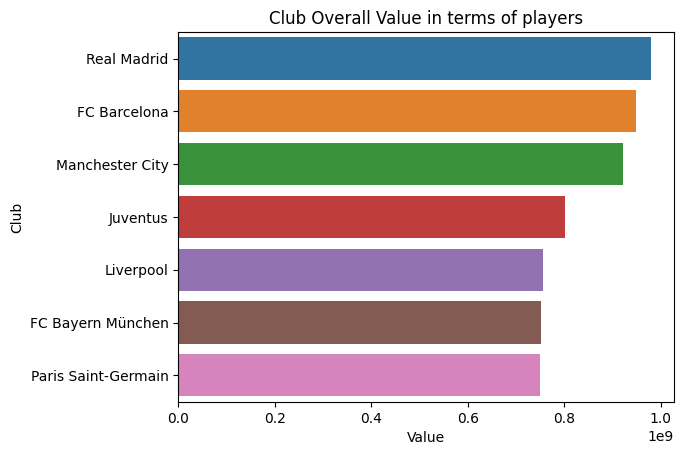

In [245]:
data = fifa_df[['club','value']].groupby('club').sum().sort_values(by='value', ascending=False).reset_index().head(7)

sns_graph = sns.barplot(data, y='club', x='value')
sns_graph.set(title='Club Overall Value in terms of players', ylabel='Club', xlabel='Value')

Polar graph showcasing player skills 

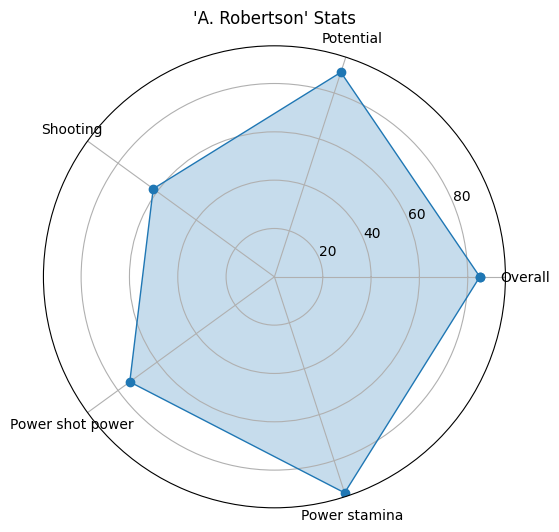

In [244]:
attributes = ['short_name','overall', 'potential', 'shooting', 'power_shot_power', 'power_stamina']

# Select the player
player_index = 82
player = fifa_df.iloc[player_index][attributes]

# Define common variables
title = f"'{player[0]}' Stats"
# attributes = fifa_df.columns[2:8].to_list()
attributes = attributes[1:]

# Attributes values for the given player
values = player[1:].to_list()
# Add the first value at the end to close the loop
values += values[:1]

#Define the angles for each attribute
angles = [n / float(len(attributes)) * 2 * np.pi for n in range(len(attributes))]
angles += angles[:1]

# Formatting Labels
attributes = [x.replace("_", " ").capitalize() for x in attributes]

# # Create the radar
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, values, 'o-', linewidth=1)                              #Plug point along with lines 
ax.fill(angles, values, alpha=0.25)                                     #Blue shade within diagram
ax.set_thetagrids([a * 180 / np.pi for a in angles[:-1]], attributes)   #Insert value names instead of numerical numbers
ax.set_title(title)

ax.grid(True)
